# Restaurant Revenue Prediction

In [2]:
# loading libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

## Import Data

In [3]:
# Importing the dataset
dataset = pd.read_csv('data-week-2a-train.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [4]:
X = X.iloc[:,1:]
X

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,3.0,0,0,0,0,0,0,0,0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,1.0,3.0,0,0,0,0,0,0,0,0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,2.0,3.0,0,0,0,0,0,0,0,0
133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,3.0,3.0,0,0,0,0,0,0,0,0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,2.0,3.0,0,0,0,0,0,0,0,0
135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,3.0,0,0,0,0,0,0,0,0


In [5]:
y.iloc[:,].reset_index()
#TODO give it a proper index name -> Revenue

,index,revenue
0,0,5653753.0
1,1,6923131.0
2,2,2055379.0
3,3,2675511.0
4,4,4316715.0
...,...,...
132,132,5787594.0
133,133,9262754.0
134,134,2544857.0
135,135,7217634.0


In [6]:
pd.to_datetime('today').normalize() # current day timestamp without hh:mm:ss ms info
# pd.to_datetime(X['Open Date']).map(lambda x: x.normalize())
(pd.to_datetime('today').normalize() - pd.to_datetime(X['Open Date'])).dt

In [7]:
X['Open Date'] = abs((pd.to_datetime(X['Open Date']) - pd.to_datetime('today').normalize()).dt.days)
X.rename(columns={'Open Date': 'DAYS'},inplace=True)
X

,DAYS,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,8992,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,5858,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,3.0,0,0,0,0,0,0,0,0
2,4008,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,1.0,3.0,0,0,0,0,0,0,0,0
3,4409,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,5408,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,5726,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,2.0,3.0,0,0,0,0,0,0,0,0
133,6348,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,3.0,3.0,0,0,0,0,0,0,0,0
134,6444,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,2.0,3.0,0,0,0,0,0,0,0,0
135,4870,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,3.0,0,0,0,0,0,0,0,0


In [8]:
X.iloc[:,0]

0      8992
1      5858
2      4008
3      4409
4      5408
       ... 
132    5726
133    6348
134    6444
135    4870
136    5293
Name: DAYS, Length: 137, dtype: int64

## Preprocessing

In [9]:
# %pip install scikit-learn
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [10]:
# one-hot-encode 'City' column
X = pd.get_dummies(X) # nice
X.head(5)

,DAYS,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,8992,4,5.0,4.0,4.0,2,2,5,4,5,...,False,False,True,False,False,True,False,False,False,True
1,5858,4,5.0,4.0,4.0,1,2,5,5,5,...,False,False,False,False,False,True,False,False,True,False
2,4008,2,4.0,2.0,5.0,2,3,5,5,5,...,False,False,False,False,False,False,True,False,False,True
3,4409,6,4.5,6.0,6.0,4,4,10,8,10,...,False,False,False,False,False,False,True,False,False,True
4,5408,3,4.0,3.0,4.0,2,2,5,5,5,...,False,False,False,False,False,False,True,False,False,True


### List of Features

In [11]:
import pprint
features = list(X.columns)
pprint.pprint(features, compact=True)
print("# of features:",len(features))

['DAYS', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22',
 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
 'P34', 'P35', 'P36', 'P37', 'City_Adana', 'City_Afyonkarahisar', 'City_Amasya',
 'City_Ankara', 'City_Antalya', 'City_Aydın', 'City_Balıkesir', 'City_Bolu',
 'City_Bursa', 'City_Denizli', 'City_Diyarbakır', 'City_Edirne', 'City_Elazığ',
 'City_Eskişehir', 'City_Gaziantep', 'City_Isparta', 'City_Karabük',
 'City_Kastamonu', 'City_Kayseri', 'City_Kocaeli', 'City_Konya', 'City_Kütahya',
 'City_Kırklareli', 'City_Muğla', 'City_Osmaniye', 'City_Sakarya',
 'City_Samsun', 'City_Tekirdağ', 'City_Tokat', 'City_Trabzon', 'City_Uşak',
 'City_İstanbul', 'City_İzmir', 'City_Şanlıurfa', 'City Group_Big Cities',
 'City Group_Other', 'Type_DT', 'Type_FC', 'Type_IL']
# of features: 77


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

min_y = min(y)
max_y = max(y)
range_y = max_y - min_y
y = y.map(lambda r: (r - min_y)/range_y)
# y = [(revenue - min(y))/(max(y) - min(y)) for revenue in y]
X


,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.819966,0.272727,0.615385,0.533333,0.222222,0.142857,0.111111,0.444444,0.333333,0.166667,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.335651,0.272727,0.615385,0.533333,0.222222,0.000000,0.111111,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.049760,0.090909,0.461538,0.266667,0.444444,0.142857,0.222222,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.111729,0.454545,0.538462,0.800000,0.666667,0.428571,0.333333,1.000000,0.777778,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.266110,0.181818,0.461538,0.400000,0.222222,0.142857,0.111111,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.315253,0.090909,0.307692,0.400000,0.444444,0.428571,0.111111,0.333333,0.333333,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
133,0.411374,0.272727,0.615385,0.533333,0.222222,0.142857,0.222222,0.444444,0.333333,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
134,0.426209,0.181818,0.461538,0.533333,0.222222,0.142857,0.222222,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
135,0.182970,0.272727,0.615385,0.533333,0.444444,0.142857,0.111111,0.444444,0.444444,0.166667,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
y

0      0.242835
1      0.311276
2      0.048822
3      0.082258
4      0.170746
         ...   
132    0.250052
133    0.437421
134    0.075213
135    0.327155
136    0.281089
Name: revenue, Length: 137, dtype: float64

In [14]:
# Splitting the dataset into the Training set and Test set
# NOTE we still split the data into train and test, because our test data, in the other csv file doesn't have response var
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# TODO random_state, test_size

In [15]:
# print(X_train)
# print(X_test)
print(y_train)
# print(y_test)

93     0.121906
66     0.039481
109    0.165492
123    0.167884
42     0.205013
         ...   
129    0.150425
79     0.278392
133    0.437421
72     0.074163
37     0.085772
Name: revenue, Length: 109, dtype: float64


## Training

### Multiple Linear Regression model 

In [16]:
from sklearn.linear_model import LinearRegression
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X_train, y_train)
y_pred = multi_lin_reg.predict(X_test)

In [17]:
sq_error1 = (y_test-y_pred)**2
msq_error1 = sq_error1.mean()
msq_error1

# Mean squared error

4.869987157137104e+19

### Decision Tree Regression model

In [18]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred2 = regressor.predict(X_test)
y_pred2

array([0.1565133 , 0.1725719 , 0.14673337, 0.04684918, 0.41808299,
       0.17682805, 0.11370891, 0.        , 0.14329089, 0.32715487,
       0.09970298, 0.1725719 , 0.41757153, 0.08854019, 0.19722124,
       0.06689273, 0.17888853, 0.04882222, 0.14203646, 0.23593297,
       0.05106748, 0.34211454, 0.83027642, 0.04684918, 0.11370891,
       0.04882222, 0.22301863, 0.18881668])

In [19]:
sq_error2 = (y_test-y_pred2)**2
msq_error2 = sq_error2.mean()
msq_error2

# Mean Squared Error

0.05524227916712544

### Polynomial Regression models

In [20]:
from sklearn.preprocessing import PolynomialFeatures

#### Degree 2

In [21]:
poly_reg = PolynomialFeatures(degree = 2) # A
X_poly2 = poly_reg.fit_transform(X_train) # A
lin_reg_quad = LinearRegression() # B
lin_reg_quad.fit(X_poly2, y_train) # B
y_pred3 = lin_reg_quad.predict(poly_reg.fit_transform(X_test))
y_pred3

array([ 0.21548705,  0.31371011,  0.22184963,  0.41505065,  0.00263479,
        0.03519404, -0.05843981,  0.04840329,  0.13349621,  0.32264396,
        0.21119795,  0.54185538,  0.35636304,  0.17327056,  0.06318915,
       -0.08775788,  0.1983528 ,  0.0903315 ,  0.52462915,  0.28577343,
        0.14074774,  0.40235287,  0.58854866,  0.26422597,  0.34649946,
        0.03391423,  0.1538946 ,  0.19052285])

In [22]:
sq_error3 = (y_test-y_pred3)**2
msq_error3 = sq_error3.mean()
msq_error3

0.048795648741742984

#### Degree 3

In [23]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly3 = poly_reg.fit_transform(X_train)
lin_reg_cubic = LinearRegression()
lin_reg_cubic.fit(X_poly3, y_train)
y_pred4 = lin_reg_cubic.predict(poly_reg.fit_transform(X_test))
y_pred4

array([ 0.19960188,  0.25239881,  0.24161795,  0.40526281,  0.0622538 ,
        0.03543804, -0.01399134,  0.10047081,  0.14706326,  0.24871413,
        0.14689839,  0.57209194,  0.37101628,  0.17815439,  0.08828598,
       -0.15777509,  0.20250309,  0.06108631,  0.4670697 ,  0.30816153,
        0.12056877,  0.39236461,  0.55880627,  0.27041184,  0.34405693,
        0.02565642,  0.14986601,  0.12293132])

In [24]:
sq_error4 = (y_test-y_pred4)**2
msq_error4 = sq_error4.mean()
msq_error4

0.04659473175405611

### Random Forest Regression model

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
rf_regressor.fit(X_train, y_train)
y_pred6 = rf_regressor.predict(X_test)
y_pred6

array([0.18377087, 0.16193656, 0.18733448, 0.13608377, 0.20662242,
       0.13843741, 0.12463177, 0.08192186, 0.12784144, 0.14009794,
       0.12372864, 0.20098915, 0.24788006, 0.15290553, 0.12857593,
       0.14768631, 0.17621878, 0.09462556, 0.18399175, 0.36298182,
       0.11725573, 0.29783217, 0.5074746 , 0.17203266, 0.16354406,
       0.06883349, 0.17084195, 0.14875685])

In [26]:
sq_error6 = (y_test-y_pred6)**2
msq_error6 = sq_error6.mean()
msq_error6


0.03322295185105459

#### Trying to make a better model by taking the most important metrics

In [27]:
importances = list(rf_regressor.feature_importances_)
features
sorted_importance = sorted([i for i in zip(features,importances,range(len(features)))],key= lambda x: x[1],reverse=True)
# sorted_importance = np.array(sorted_importance)
most_important_features = pd.DataFrame(sorted_importance, columns=['Feature','Importance','Index']).head(50)
most_important_features.head(20)

,Feature,Importance,Index
0,P29,0.206022,29
1,DAYS,0.131702,0
2,P17,0.091569,17
3,P2,0.059081,2
4,P28,0.045668,28
5,City_İstanbul,0.045339,69
6,P23,0.037390,23
7,P20,0.036696,20
8,P1,0.034717,1
9,City_İzmir,0.027816,70


### Visualising the importance of each of the features

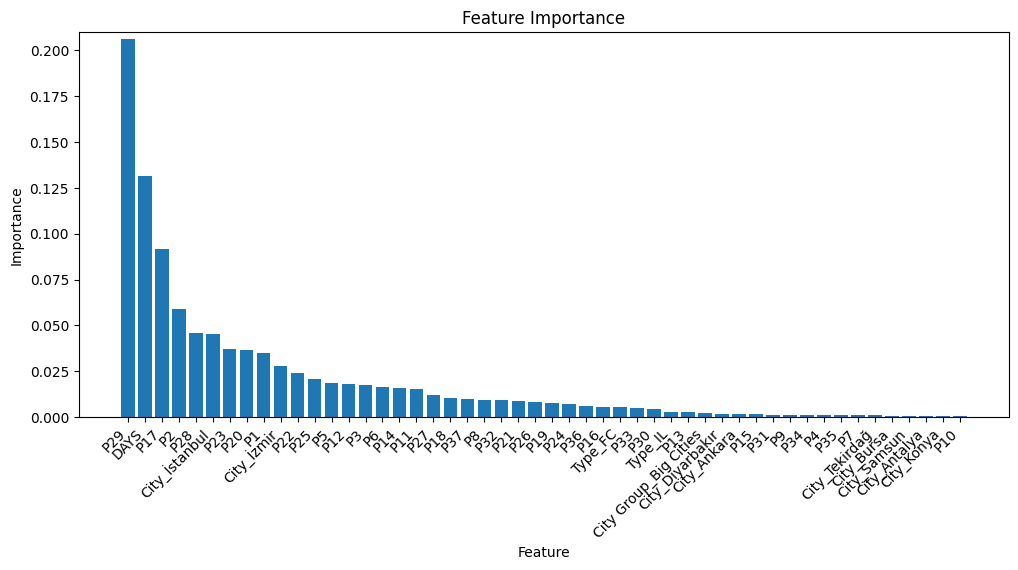

In [28]:
fig = plt.figure(figsize=(12,5))
plt.bar(most_important_features["Feature"], most_important_features["Importance"], orientation = 'vertical')
 
plt.xticks(most_important_features["Feature"], rotation=45, ha="right")
plt.ylim(0,0.21)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importance')
plt.show()

In [29]:
# TAKE ONLY THE TOP 7 features
topfeatures = most_important_features.iloc[0:7,2] 
X_train_2 = X_train[topfeatures]
X_test_2 = X_test[topfeatures]
# TRAIN THE MODEL
rf_regressor_2 = RandomForestRegressor(n_estimators = 34, random_state = 0)
rf_regressor_2.fit(X_train_2, y_train)
y_pred_2 = rf_regressor_2.predict(X_test_2)
#  CALCULATE THE MSQ
sq_error_2 = (y_test-y_pred_2)**2
msq_error_2 = sq_error_2.mean()
msq_error_2

0.03168127799734921

We note that the MSQ has reduced from  0.0332 to 0.0317 on considering only the top 6 features.

NOTE: On adding more than 7 variabfeatures, the MSE increases. On selecting top 9 features (which are more significant than the rest), the MSE becomes 0.35 which is worse. But that might be a better model, because the lower MSE in this case might be a result of bias in data.